Imagine we sell icecreams in the local park. We want to know how many ice-creams we are going to sell each day because we need to buy enough icecream and cones for everyone without having too much waste left over at the end of the day. We know how many icecreams we sold on different days in the past - can we use this data to predict how many we might sell in the future.

First we need some libraries for python.
- Pandas allows us to use tables for our data.
- Scikit-learn (sklearn) is one of the main python libraries for many different machine learning models.
- Matplotlib allows us to make graphs of our data.

In [1]:
import pandas
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In order to see how well our model performs, we will want to train the model on some of our data and then test it on data our model has not yet seen. In this case, the train and test data have been split into two different files already.


In [2]:
icream_sales_train_data = pandas.read_csv(r"TableSalesPredictCSV.csv")

In [3]:
# The .head command allows us to see the first few rows of our data in the table.
icream_sales_train_data.head()

,Day of the week,Will it rain?,Temperature,Local funfair,Price of icecream at local supermarket,Price of catfood at local supermarket,Icecreams sold
0,Monday,Yes,21,No,1.2,3.0,42
1,Monday,Yes,23,No,1.5,3.2,53
2,Monday,No,25,No,1.5,3.4,62
3,Monday,Yes,21,No,1.7,3.6,46
4,Tuesday,No,22,No,1.2,3.0,56


Data Analysis

The first thing we tend to do with any new data project is use graphs and some simple statistics to look at whether we can see a relationship between the data we have (features) and what we want to predict (target).

For example, if there is a funfair on, do we sell more icecream?

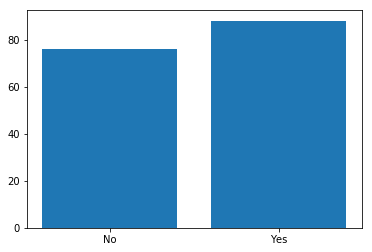

In [4]:
plt.bar(icream_sales_train_data["Local funfair"], icream_sales_train_data["Icecreams sold"])
plt.show()

Yes - it looks like when there is a funfair on we sell more icecream.

This is possibly unsurprising - the local funfair probably means more people coming to the park so more people to buy icecream.

How about the temperature?

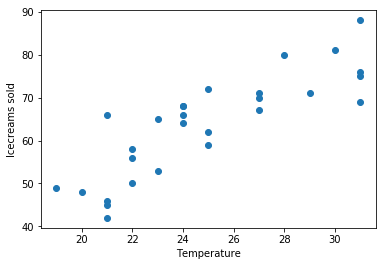

In [5]:
plt.scatter(icream_sales_train_data["Temperature"], icream_sales_train_data["Icecreams sold"])
plt.xlabel("Temperature")
plt.ylabel("Icecreams sold")

plt.show()

So again, we can see a pattern - if it's hotter, we tend to sell more icecream. Maybe this will be useful in our model as well. How about day of the week? We could do this using another bar graph but just comparing the averages doesn't always tell us enough. 
We can look at the spread of our values using something called a boxplot. A boxplot, takes all our values and lines them up in increasing order. Then we see a line (in this case in orange) where the middle value sits and a box around the middle half of our values. The lowest value and highest value are also shown.

In [6]:
# To draw a boxplot, we need to provide a list of data points for each day of the week. We can pull these out of
# the table by selecting all the rows where 'Day of the week' is the day we want and then selecting 
# the 'Icecreams sold' column
icecreams_monday = icream_sales_train_data.loc[icream_sales_train_data["Day of the week"] == "Monday"]["Icecreams sold"]
icecreams_tuesday = icream_sales_train_data.loc[icream_sales_train_data["Day of the week"] == "Tuesday"]["Icecreams sold"]
icecreams_wednesday = icream_sales_train_data.loc[icream_sales_train_data["Day of the week"] == "Wednesday"]["Icecreams sold"]
icecreams_thursday = icream_sales_train_data.loc[icream_sales_train_data["Day of the week"] == "Thursday"]["Icecreams sold"]
icecreams_friday = icream_sales_train_data.loc[icream_sales_train_data["Day of the week"] == "Friday"]["Icecreams sold"]
icecreams_saturday = icream_sales_train_data.loc[icream_sales_train_data["Day of the week"] == "Saturday"]["Icecreams sold"]
icecreams_sunday = icream_sales_train_data.loc[icream_sales_train_data["Day of the week"] == "Sunday"]["Icecreams sold"]

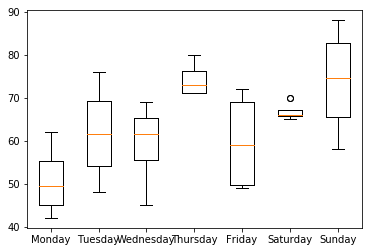

In [8]:
plt.boxplot([icecreams_monday, icecreams_tuesday, icecreams_wednesday, icecreams_thursday, icecreams_friday, icecreams_saturday, icecreams_sunday], labels = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.show()

So it looks like, in general, we sell more icecream at the weekend. Although we do also seem to sell lots of icecream on a Thursday as well...

We also have some data on the price of catfood in the local supermarket? Do we think this makes a difference to how many icecreams we will sell?

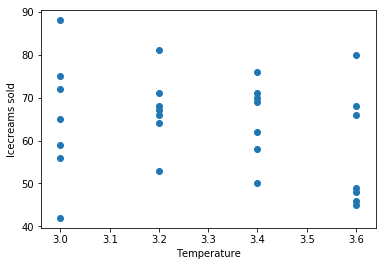

In [9]:
plt.scatter(icream_sales_train_data["Price of catfood at local supermarket"], icream_sales_train_data["Icecreams sold"])
plt.xlabel("Temperature")
plt.ylabel("Icecreams sold")

plt.show()

Not really any relationship here. And we probably wouldn't expect one. Why would the price of catfood in the local supermarket affect how many icecreams we sell?

So how abour price of icecream in the local supermarket? We might think if icecream is really cheap in the local supermarket then people might choose to buy it there instead of from our icecream stand.

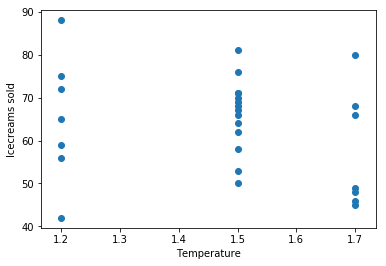

In [10]:
plt.scatter(icream_sales_train_data["Price of icecream at local supermarket"], icream_sales_train_data["Icecreams sold"])
plt.xlabel("Temperature")
plt.ylabel("Icecreams sold")

plt.show()

We don't see a strong relationship here either. Maybe we will leave this out for now as well.

Data Preparation

Now that we know which features we want, we need to get them into the right format for our modeling. Models understand numbers but, for example, day of the week is categorical (one of several categories). We can convert categories into numbers by using one hot encoding. However, in this case, we may also want to just split the days into whether the day is a weekend or not.

To do this, we create another column in our table and map the 'Day of the week' column to 1 if the day is a Saturday or Sunday or 0 otherwise.

In [11]:
icream_sales_train_data["isWeekend"] = icream_sales_train_data["Day of the week"].map(lambda x: 1 if x == "Saturday" or x == "Sunday" else 0)


We can do the same with 'Will it rain?'


In [12]:
icream_sales_train_data["rains"] = icream_sales_train_data["Will it rain?"].map(lambda x: 1 if x == "Yes" else 0)


In [13]:
icream_sales_train_data.head()

,Day of the week,Will it rain?,Temperature,Local funfair,Price of icecream at local supermarket,Price of catfood at local supermarket,Icecreams sold,isWeekend,rains
0,Monday,Yes,21,No,1.2,3.0,42,0,1
1,Monday,Yes,23,No,1.5,3.2,53,0,1
2,Monday,No,25,No,1.5,3.4,62,0,0
3,Monday,Yes,21,No,1.7,3.6,46,0,1
4,Tuesday,No,22,No,1.2,3.0,56,0,0


Modeling the data

Now we can try and build a model that predicts the number of icreams sold based on our features of 'Temperature', 'isWeekend' and 'rains'.

In [14]:

X = icream_sales_train_data[["Temperature", "isWeekend", "rains"]]

Y = icream_sales_train_data["Icecreams sold"]

reg = LinearRegression().fit(X, Y)

How well does this model predict our sales?

In [15]:
reg.score(X, Y)

0.8986244801047434

This is a measure of our accuracy, with 0 being not accurate at all and 1 being completely accurate. So getting nearly 0.9 is not bad. But, this is using the data that we trained the model on - we expect it to be accurate. How about the data we 'held out' as test data?

In [21]:
test_data_icecream_sales = pandas.read_csv(r"TableSalesPredictTestDataCSV.csv")

In [17]:
test_data_icecream_sales

,Day of the week,Will it rain?,Temperature,Local funfair,Price of icecream at local supermarket,Price of catfood at local supermarket,Icecreams sold
0,Monday,Yes,17,No,1.5,4.5,38
1,Monday,No,29,No,1.2,4.0,73
2,Tuesday,Yes,32,No,1.2,4.2,73
3,Tuesday,No,28,No,1.7,4.5,70
4,Wednesday,Yes,21,No,1.2,4.0,48
5,Wednesday,Yes,22,No,1.5,4.2,49
6,Thursday,Yes,22,No,1.2,4.2,50
7,Thursday,No,24,No,1.7,4.5,61
8,Friday,Yes,27,No,1.5,4.0,60
9,Friday,Yes,29,Yes,1.2,4.0,74


First, we need to map our features to numbers like we did with the training data.

In [18]:
test_data_icecream_sales["isWeekend"] = test_data_icecream_sales["Day of the week"].map(lambda x: 1 if x == "Saturday" or x == "Sunday" else 0)
test_data_icecream_sales["rains"] = test_data_icecream_sales["Will it rain?"].map(lambda x: 1 if x == "Yes" else 0)


Now we can predict how many icecreams we would expect to sell for each row of our test data using our model

In [19]:
reg.predict(test_data_icecream_sales[["Temperature", "isWeekend", "rains"]])

array([36.42617453, 75.53558172, 76.59681849, 72.85753879, 47.13834625,
       49.81638918, 49.81638918, 62.14536706, 63.20660384, 68.5626897 ,
       66.83923791, 72.19532377, 72.19532377, 67.90047469])

Let's see how accurate that is

In [20]:
reg.score(test_data_icecream_sales[["Temperature", "isWeekend", "rains"]], test_data_icecream_sales["Icecreams sold"])

0.9369487665490891

But wait, we forgot to include the funfair... This can be included in the same way as whether it was raining. Does this make our model better or worse?